# CSCE 5214 Project 1
## Iowa liquor Data processiong and visulaization
### Authors: haiyiwang@my.unt.edu

In [2]:
# package installation

# Use pandas-gbq to load data and run queries from BigQuery.
# see: https://cloud.google.com/bigquery/docs/pandas-gbq-migration
!pip install pandas-gbq 'google-cloud-bigquery[bqstorage,pandas]' --user -q

31.86s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [3]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from google.cloud import bigquery
from google.cloud.bigquery import Client
from sklearn.metrics import (mean_absolute_error,
                             mean_absolute_percentage_error,
                             mean_squared_error)

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [4]:
# Constants

# Project and dataset where the model will be saved
PROJECT = "csce5214-p1"
DATASET = "csce5214_iowa_sales"

# Source table for training data
SOURCE_TABLE = "'bigquery-public-data`.iowa_liquor_sales.sales"

#MODEL_NAME_PREFIX = "bqml_arimaplus_dw_"
#MODEL_TYPE = "arima_plus"

#HORIZON = 30
#GRANULARITY = "DAILY"

In [5]:
client = Client(project=PROJECT)

In [6]:
query = """
SELECT *  FROM `bigquery-public-data.iowa_liquor_sales.sales`
where date between '2017-01-01' and '2022-06-30'
"""
query_job = client.query(query)

In [7]:
df = query_job.to_dataframe()

In [9]:
df.head(10)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-30344900004,2020-09-18,5864,Casey's General Store #2803 / Villisca,309 N U Ave,Villisca,50864,POINT (-94.985437 40.934673),69,MONTGOMERY,...,36904,McCormick 80prf Vodka PET,24,375,1.80,2.70,72,194.40,27.0,7.13
1,INV-34229000003,2021-02-11,5982,Casey's General Store #6 / Altoona,407 8th St SW,Altoona,50009.0,POINT (-93.469065 41.64403500000001),77,POLK,...,37996,Smirnoff 80prf,12,750,8.25,12.38,36,445.68,27.0,7.13
2,INV-26244900132,2020-04-01,2521,Hy-Vee Food and Drug / Grand / WDM,1990 Grand Avenue,West Des Moines,50265.0,POINT (-93.73162 41.571127),77,POLK,...,37413,Popov 80prf,48,200,1.75,2.63,4,10.52,0.8,0.21
3,INV-37665500005,2021-06-21,4915,Casey's General Store #2429 / Bettendorf,"3902, State St",Bettendorf,52722.0,POINT (-90.47859 41.53064),82,SCOTT,...,36901,McCormick 80prf Vodka Mini,6,50,4.70,7.05,6,42.30,0.3,0.07
4,INV-11514800015,2018-04-16,5100,Sam's Food,648 N Marquette St,Davenport,52802.0,POINT (-90.590879 41.526469),82,SCOTT,...,36903,Mccormick Vodka,48,200,1.13,1.70,48,81.60,9.6,2.54
5,INV-36436700061,2021-05-07,2607,Hy-Vee Wine and Spirits / Shenandoah,520 So Fremont,Shenandoah,51601.0,POINT (-95.385111 40.761736),73,PAGE,...,37993,Smirnoff 80prf,48,200,2.54,3.81,4,15.24,0.8,0.21
6,INV-12811100042,2018-06-21,4829,Central City 2,1501 Michigan Ave,Des Moines,50314,POINT (-93.613739 41.60572),77,POLK,...,36887,McCormick Vodka,12,1000,4.13,6.20,48,297.60,48.0,12.68
7,INV-06396000044,2017-08-01,4361,Quik Trip #538 / NW 2nd / DSM,4575 NW 2nd,Des Moines,50313.0,POINT (-93.619906 41.643664),77,POLK,...,37993,Smirnoff 80prf,48,200,2.54,3.81,4,15.24,0.8,0.21
8,INV-40559400023,2021-09-30,2106,Hillstreet News and Tobacco,2217 College,Cedar Falls,50613.0,POINT (-92.455796 42.517182),7,BLACK HAWK,...,38177,Titos Handmade Vodka,12,1000,12.67,19.01,60,1140.60,60.0,15.85
9,INV-34593000001,2021-02-25,5282,Yesway Store # 10019/ Mason City,1224 Federal Ave N,Mason City,50401.0,POINT (-93.201061 43.163367),17,CERRO GORD,...,36302,Hawkeye Vodka,48,200,1.15,1.73,144,249.12,28.8,7.60


In [10]:
df['city']['city'= 'Villisca']

SyntaxError: invalid syntax (2837744746.py, line 1)

In [11]:
rslt_df = df.loc[df['city'] == 'Villisca']

In [12]:
rslt_df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-30344900004,2020-09-18,5864,Casey's General Store #2803 / Villisca,309 N U Ave,Villisca,50864,POINT (-94.985437 40.934673),69,MONTGOMERY,...,36904,McCormick 80prf Vodka PET,24,375,1.80,2.70,72,194.40,27.00,7.13
6289,INV-24478800016,2020-01-10,5864,Casey's General Store #2803 / Villisca,309 N U Ave,Villisca,50864.0,POINT (-94.985437 40.934673),69,MONTGOMERY,...,35914,Five O'Clock Vodka,24,375,1.93,2.90,9,26.10,3.37,0.89
12320,INV-24781200005,2020-01-24,5864,Casey's General Store #2803 / Villisca,309 N U Ave,Villisca,50864.0,POINT (-94.985437 40.934673),69,MONTGOMERY,...,36904,McCormick 80prf Vodka PET,24,375,1.80,2.70,9,24.30,3.37,0.89
12401,INV-25524300007,2020-02-28,5864,Casey's General Store #2803 / Villisca,309 N U Ave,Villisca,50864.0,POINT (-94.985437 40.934673),69,MONTGOMERY,...,36304,Hawkeye Vodka,24,375,1.86,2.79,9,25.11,3.37,0.89
23018,INV-38405200006,2021-07-16,5864,Casey's General Store #2803 / Villisca,309 N U Ave,Villisca,50864.0,POINT (-94.985437 40.934673),69,MONTGOMERY,...,36304,Hawkeye Vodka,24,375,1.86,2.79,72,200.88,27.00,7.13


In [13]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,1.352144e+07,1.352144e+07,1.352144e+07,1.352144e+07,1.352144e+07,1.352144e+07,1.352144e+07,1.352144e+07
mean,1.223921e+01,8.656266e+02,1.069740e+01,1.604802e+01,1.126422e+01,1.500622e+02,9.316561e+00,2.457186e+00
std,7.961545e+00,5.233113e+02,9.744447e+00,1.461633e+01,3.255452e+01,5.285318e+02,3.889444e+01,1.027497e+01
min,1.000000e+00,2.000000e+01,3.300000e-01,5.000000e-01,0.000000e+00,0.000000e+00,2.000000e-02,0.000000e+00
25%,6.000000e+00,7.500000e+02,5.600000e+00,8.400000e+00,3.000000e+00,3.600000e+01,1.500000e+00,4.000000e-01
50%,1.200000e+01,7.500000e+02,8.500000e+00,1.275000e+01,6.000000e+00,7.866000e+01,4.800000e+00,1.260000e+00
75%,1.200000e+01,1.000000e+03,1.300000e+01,1.950000e+01,1.200000e+01,1.530000e+02,1.050000e+01,2.770000e+00
max,1.200000e+02,3.150000e+04,2.198890e+03,3.298340e+03,1.320000e+04,2.795573e+05,1.320000e+04,3.487070e+03


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13521437 entries, 0 to 13521436
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             object 
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 object 
 7   store_location           object 
 8   county_number            object 
 9   county                   object 
 10  category                 object 
 11  category_name            object 
 12  vendor_number            object 
 13  vendor_name              object 
 14  item_number              object 
 15  item_description         object 
 16  pack                     int64  
 17  bottle_volume_ml         int64  
 18  state_bottle_cost        float64
 19  state_bottle_retail      float64
 20  bottles_sold             int64  
 21  sale_d

In [15]:
#change datatype of date to date
df['date'] = pd.to_datetime(df['date'])

In [16]:
df[['date']].dtypes

date    datetime64[ns]
dtype: object

In [17]:
# check the missing data
df.isnull().sum()

invoice_and_item_number          0
date                             0
store_number                     0
store_name                       0
address                      50842
city                         50841
zip_code                     50841
store_location             1379038
county_number                50843
county                       50841
category                      8751
category_name                 8751
vendor_number                    7
vendor_name                      7
item_number                      0
item_description                 0
pack                             0
bottle_volume_ml                 0
state_bottle_cost                0
state_bottle_retail              0
bottles_sold                     0
sale_dollars                     0
volume_sold_liters               0
volume_sold_gallons              0
dtype: int64

In [18]:
df_null = pd.DataFrame(df.isnull().sum()).reset_index().rename(columns={0:'total_number'})
df_null["percent"] = 100*df_null["total_number"] / int(len(df))
df_null

,index,total_number,percent
0,invoice_and_item_number,0,0.000000
1,date,0,0.000000
2,store_number,0,0.000000
3,store_name,0,0.000000
4,address,50842,0.376010
5,city,50841,0.376003
6,zip_code,50841,0.376003
7,store_location,1379038,10.198901
8,county_number,50843,0.376018
9,county,50841,0.376003


In [19]:
#drop the missing value
df = df.dropna()

In [20]:
df.shape

(12134377, 24)

## Data_visualization

The relation between item category and sale_dollas,bottle_sold,profit

In [21]:
# The relation between category and sale_dollars
df_category = df.groupby(["category_name"])["sale_dollars"].sum().reset_index().sort_values("sale_dollars", ascending=False)

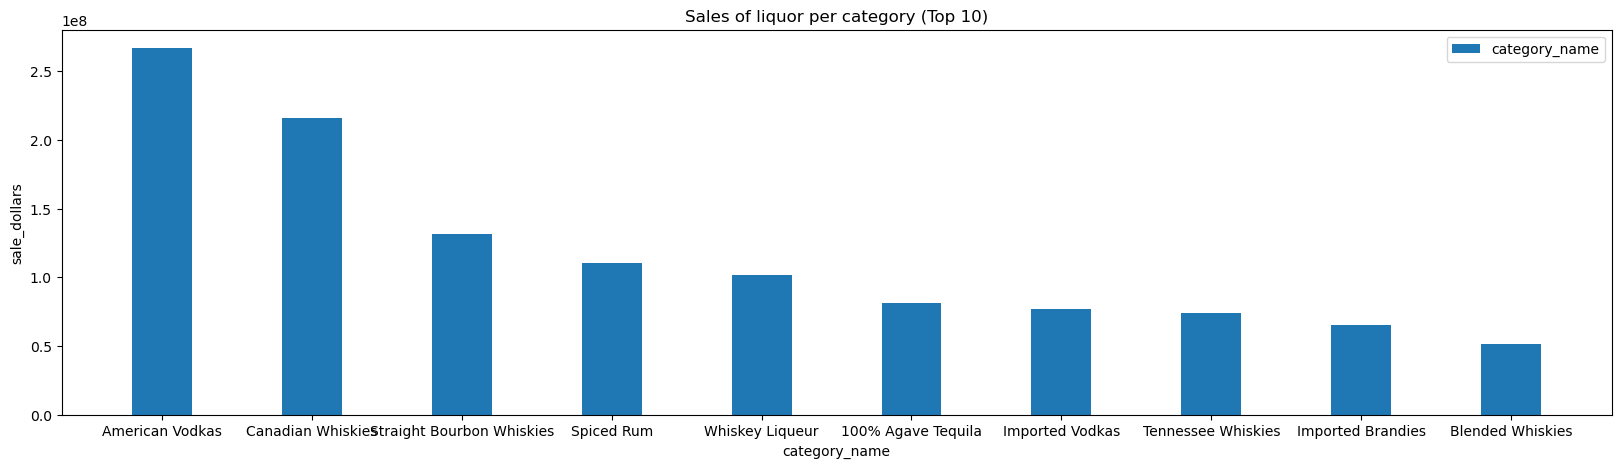

In [22]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df_category[:10]['category_name'], df_category[:10]['sale_dollars'],
        label ='category_name',width = 0.4)
 
plt.xlabel("category_name")
plt.ylabel("sale_dollars")
plt.title("Sales of liquor per category (Top 10)")
plt.legend(loc='best')
plt.show()

In [23]:
# The relation between category and bottles_sold
df_category = df.groupby(["category_name"])["bottles_sold"].sum().reset_index().sort_values("bottles_sold", ascending=False)

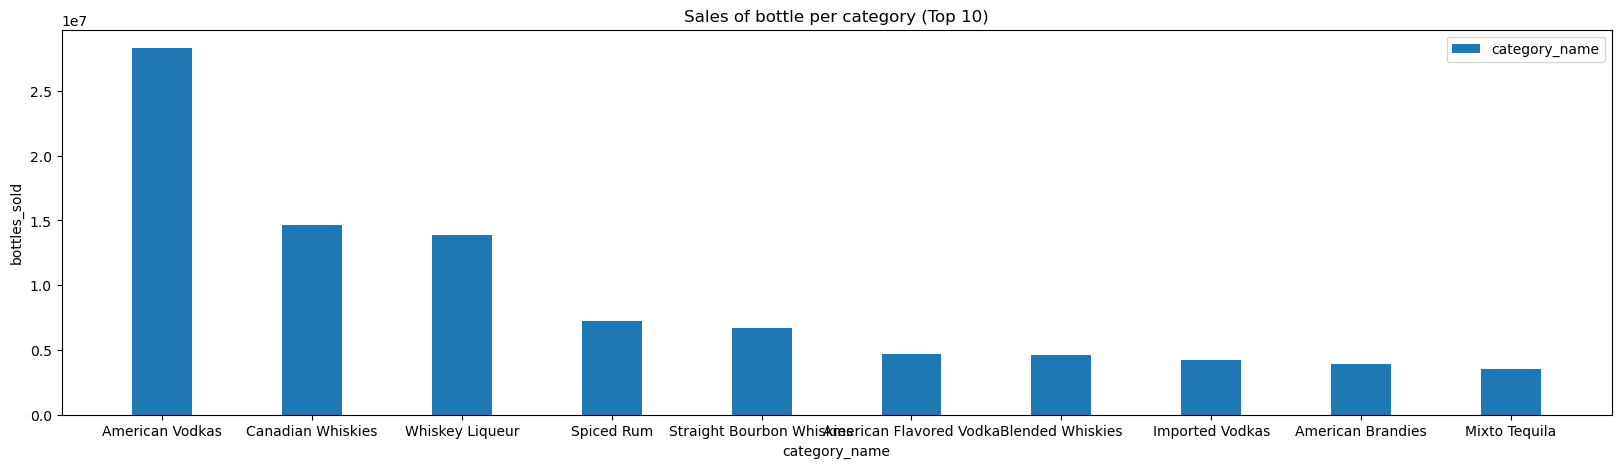

In [24]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df_category[:10]['category_name'], df_category[:10]['bottles_sold'],
        label ='category_name',width = 0.4)
 
plt.xlabel("category_name")
plt.ylabel("bottles_sold")
plt.title("Sales of bottle per category (Top 10)")
plt.legend(loc='best')
plt.show()

In [25]:
# item profit 
df['profit'] = df['state_bottle_retail'] - df['state_bottle_cost']

In [26]:
# The relation between canegory and profit
df_category = df.groupby(["category_name"])["profit"].sum().reset_index().sort_values("profit", ascending=False)

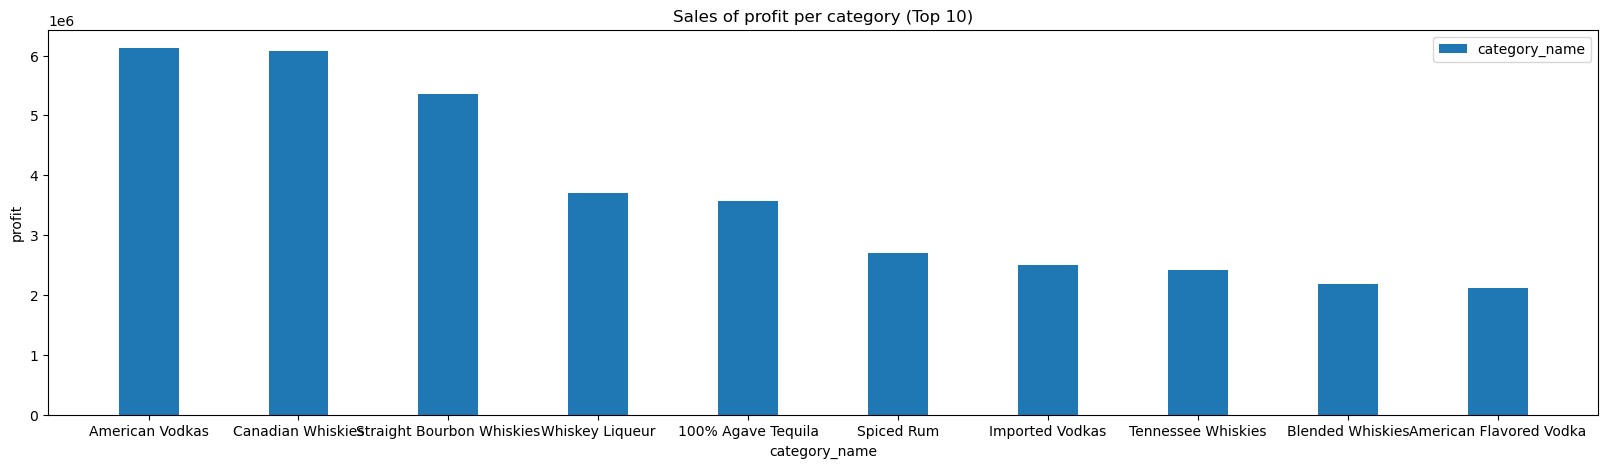

In [27]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df_category[:10]['category_name'], df_category[:10]['profit'],
        label ='category_name',width = 0.4)
 
plt.xlabel("category_name")
plt.ylabel("profit")
plt.title("Sales of profit per category (Top 10)")
plt.legend(loc='best')
plt.show()

The relation between country and sale_dollas,bottle_sold,profit

In [28]:
# The relation between county and sale_dollars
df_county = df.groupby(["county"])["sale_dollars"].sum().reset_index().sort_values("sale_dollars", ascending=False)

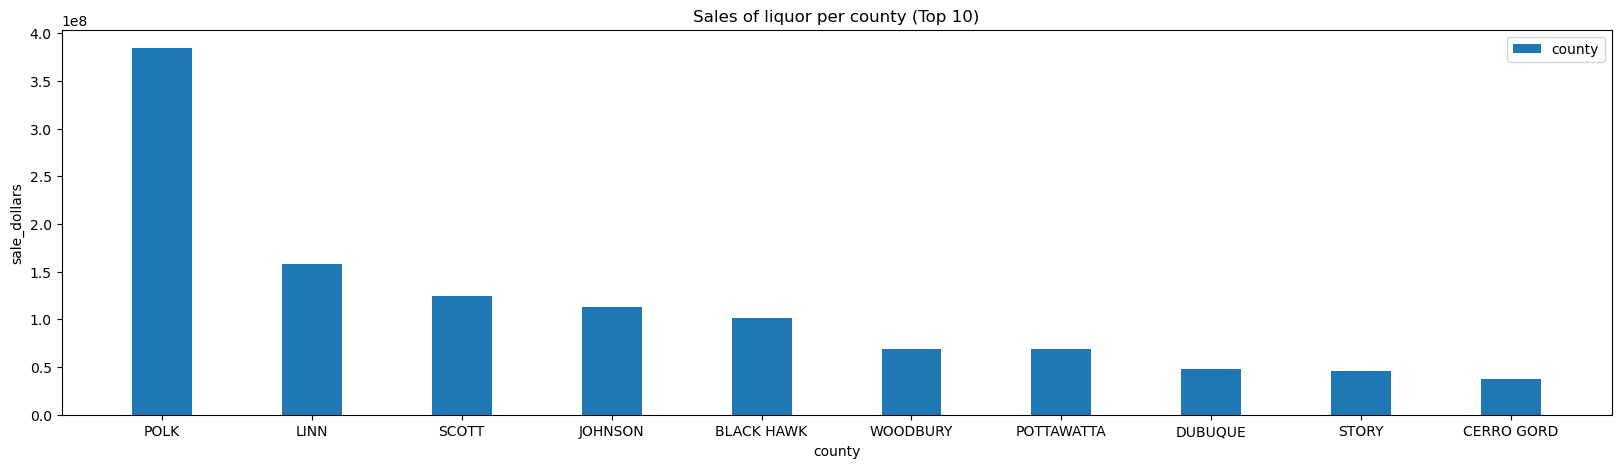

In [29]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df_county[:10]['county'], df_county[:10]['sale_dollars'],
        label ='county',width = 0.4)
 
plt.xlabel("county")
plt.ylabel("sale_dollars")
plt.title("Sales of liquor per county (Top 10)")
plt.legend(loc='best')
plt.show()

In [30]:
# The relation between county and bottles_sold
df_county = df.groupby(["county"])["bottles_sold"].sum().reset_index().sort_values("bottles_sold", ascending=False)

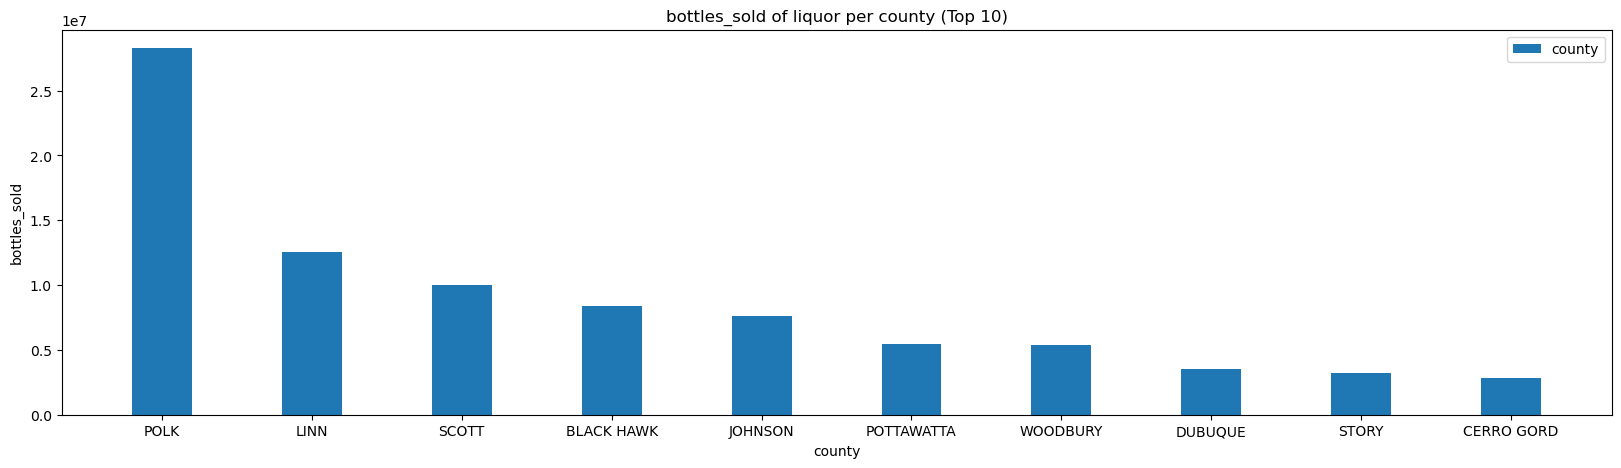

In [31]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df_county[:10]['county'], df_county[:10]['bottles_sold'],
        label ='county',width = 0.4)
 
plt.xlabel("county")
plt.ylabel("bottles_sold")
plt.title("bottles_sold of liquor per county (Top 10)")
plt.legend(loc='best')
plt.show()

In [32]:
# The relation between county and profit
df_county = df.groupby(["county"])["profit"].sum().reset_index().sort_values("profit", ascending=False)

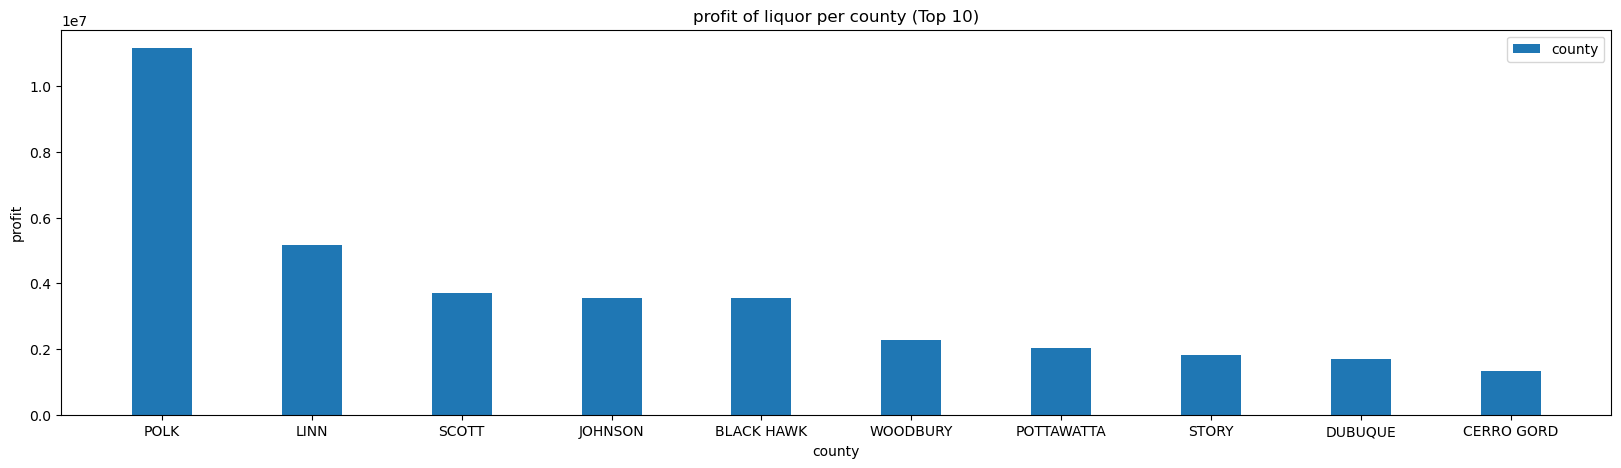

In [33]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(df_county[:10]['county'], df_county[:10]['profit'],
        label ='county',width = 0.4)
 
plt.xlabel("county")
plt.ylabel("profit")
plt.title("profit of liquor per county (Top 10)")
plt.legend(loc='best')
plt.show()

Chnange the daily data to monthly data

In [34]:
df_month = df[['date','sale_dollars']]

In [35]:
df_month.head()

,date,sale_dollars
0,2020-09-18,194.40
1,2021-02-11,445.68
2,2020-04-01,10.52
3,2021-06-21,42.30
4,2018-04-16,81.60


In [36]:
df_month.set_index('date',inplace=True)
df_month.index = pd.to_datetime(df_month.index)
df_month_new = df_month.resample('MS').sum()

In [37]:
df_month_new.head(10)

,sale_dollars
date,
2017-01-01,17669818.37
2017-02-01,20460184.59
2017-03-01,22206185.90
2017-04-01,20522551.01
2017-05-01,25058219.74
2017-06-01,25540989.87
2017-07-01,22348944.10
2017-08-01,24659992.19
2017-09-01,21857938.77


In [38]:
df_month_new.shape

(66, 1)

## ARIMA model

<AxesSubplot:xlabel='date'>

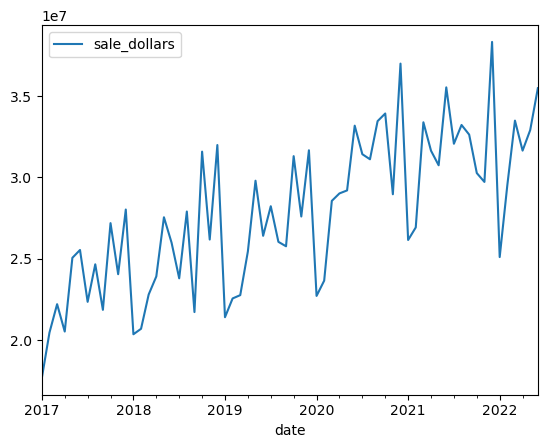

In [39]:
df_month_new.plot()

In [40]:
# we need test the stationarity
# we will use adfuller from library
from statsmodels.tsa.stattools import adfuller
result_test_data = adfuller(df_month_new['sale_dollars'])

In [41]:
# we use F-test to evaulate the result
# We assume H0: the result is not stationary ,H1:the result is stationary
def adfuller_test(sale_dollars):
    result = adfuller(sale_dollars)
    label_list = ['F-test','P-value','Lags','Number of observations']
    for value,label in zip(result,label_list):
        print(label + ':' + str(value))
    if result[1] <=0.05:
        print('we reject the H0,we accept H1')
    else:
        print('we cannot reject H0, we need accept H0')

In [42]:
# The p-value is 0.85.it is greater then 0.05, So we can't reject the H0
adfuller_test(df_month_new['sale_dollars'])

F-test:-0.6856508057168805
P-value:0.8504313752373232
Lags:11
Number of observations:54
we cannot reject H0, we need accept H0


In [43]:
# Differecing the date: 1 shift
df_month_new['sale_dollars_first_differ'] = df_month_new['sale_dollars'] - df_month_new['sale_dollars'].shift(1)

In [44]:
#when we difference 1,the p-value is 0.001,it is less then 0.05, we reject the H0, the data is stationary
adfuller_test(df_month_new['sale_dollars_first_differ'].dropna())

F-test:-4.078479605628476
P-value:0.0010509666469033958
Lags:11
Number of observations:53
we reject the H0,we accept H1


<AxesSubplot:xlabel='date'>

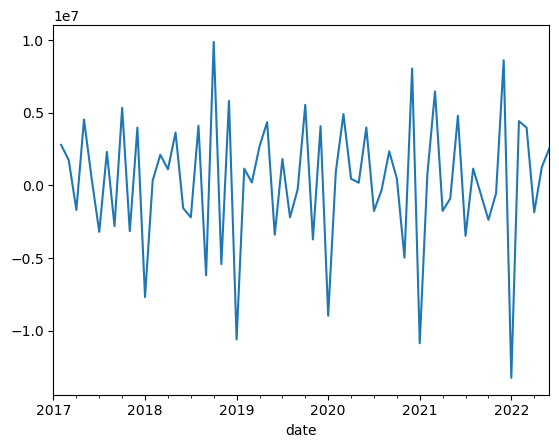

In [45]:
df_month_new['sale_dollars_first_differ'].plot()

## ACF and PACF

In [46]:
# We will use ACF and PACF to find the parameter p and q
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

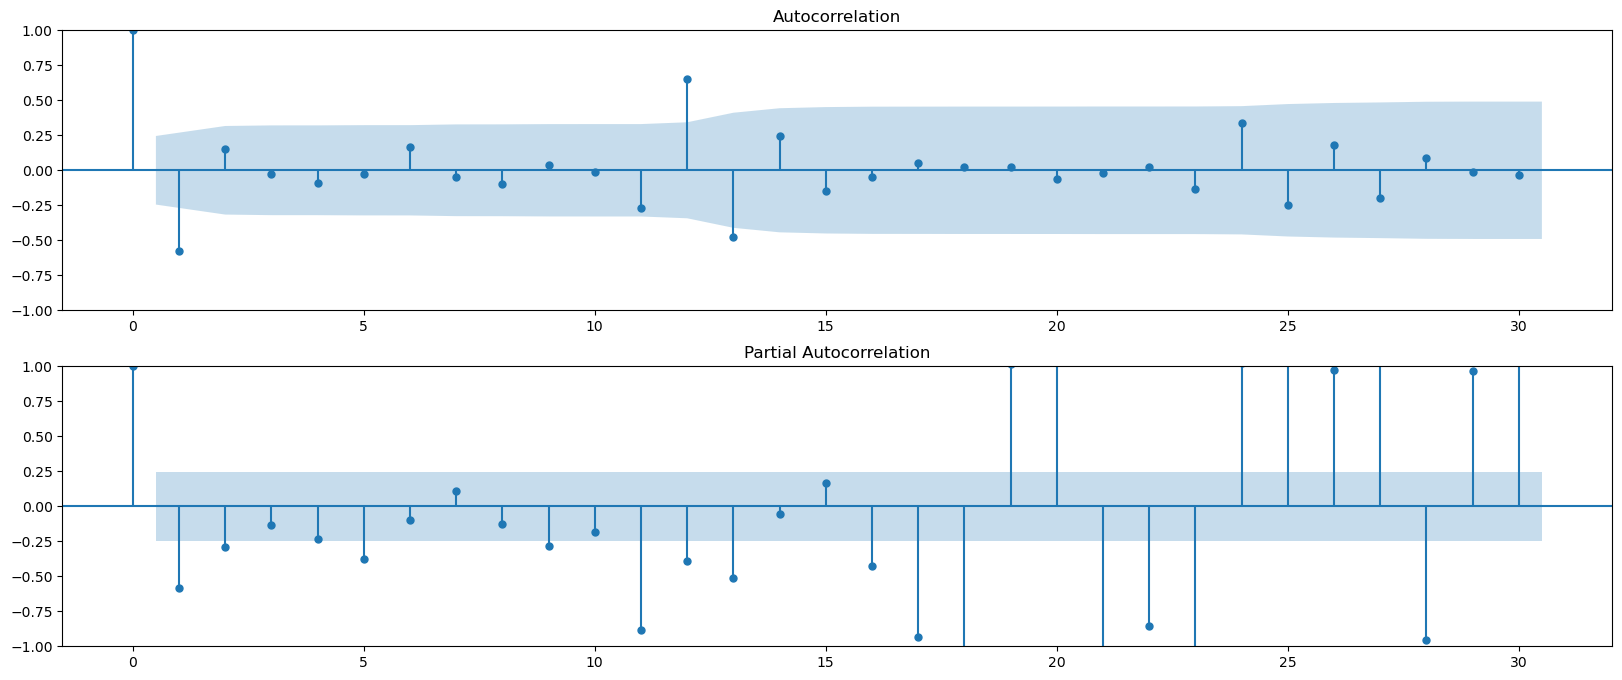

In [47]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_month_new['sale_dollars_first_differ'].iloc[2:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_month_new['sale_dollars_first_differ'].iloc[2:],lags=30,ax=ax2)

In [48]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 


In [49]:
# load dataset
# evaluate parameters
p_values = range(0,11)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df_month_new['sale_dollars_first_differ'].dropna().values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=5146022.648
ARIMA(0, 0, 1) RMSE=3671270.194
ARIMA(0, 0, 2) RMSE=3659451.003
ARIMA(0, 1, 0) RMSE=8978220.407
ARIMA(0, 1, 1) RMSE=5176541.457
ARIMA(0, 1, 2) RMSE=3702955.601
ARIMA(0, 2, 0) RMSE=16337480.809
ARIMA(0, 2, 1) RMSE=9130181.071
ARIMA(0, 2, 2) RMSE=5590439.227
ARIMA(1, 0, 0) RMSE=4373290.444
ARIMA(1, 0, 1) RMSE=3656220.457
ARIMA(1, 0, 2) RMSE=3538583.397
ARIMA(1, 1, 0) RMSE=7094277.796
ARIMA(1, 1, 1) RMSE=4408471.820
ARIMA(1, 1, 2) RMSE=3947626.137
ARIMA(1, 2, 0) RMSE=12158076.503
ARIMA(1, 2, 1) RMSE=7185894.851
ARIMA(1, 2, 2) RMSE=4681533.749
ARIMA(2, 0, 0) RMSE=4059367.841
ARIMA(2, 0, 1) RMSE=3720439.947
ARIMA(2, 0, 2) RMSE=3737339.114
ARIMA(2, 1, 0) RMSE=5520921.202
ARIMA(2, 1, 1) RMSE=4167182.615
ARIMA(2, 1, 2) RMSE=4098057.097
ARIMA(2, 2, 0) RMSE=8937111.657
ARIMA(2, 2, 1) RMSE=5608191.976
ARIMA(2, 2, 2) RMSE=437506220.808
ARIMA(3, 0, 0) RMSE=4125251.629
ARIMA(3, 0, 1) RMSE=4000597.620
ARIMA(3, 0, 2) RMSE=4117310.473
ARIMA(3, 1, 0) RMSE=5011294.588
ARIM

In [50]:
# For non-seasonal data
#p=8, d=0, q=2
from statsmodels.tsa.arima_model import ARIMA

In [51]:
model=sm.tsa.arima.ARIMA(df_month_new['sale_dollars'],order=(8,0,2))
model_fit=model.fit()

In [52]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           sale_dollars   No. Observations:                   66
Model:                 ARIMA(8, 0, 2)   Log Likelihood               -1078.596
Date:                Wed, 05 Oct 2022   AIC                           2181.191
Time:                        19:47:53   BIC                           2207.467
Sample:                    01-01-2017   HQIC                          2191.574
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.779e+07   5.12e-09   5.42e+15      0.000    2.78e+07    2.78e+07
ar.L1         -1.2520      0.227     -5.509      0.000      -1.698      -0.807
ar.L2         -0.3277      0.312     -1.049      0.294      -0.940       0.285
ar.L3          0.5690      0.274      2.078      0.038       0.032       1.106
ar.L4          0.2312      0.297      0.779      0.436      -0.350       0.813
ar.L5         -0.0088      0.334     -0.026      0.979      -0.663       0.645
ar.L6          0.4273      0.296      1.443      0.149      -0.153       1.008
ar.L7          0.7933      0.291      2.730      0.006       0.224       1.363
ar.L8          0.3515      0.244      1.443      0.149      -0.126       0.829
ma.L1          1.4886      0.300      4.965      0.000       0.901       2.076
ma.L2          0.9624      0.323      2.979      0.003       0.329       1.596
sigma2      1.073e+13   4.33e-14   2.48e+26      0.000    1.07e+13    1.07e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.68   Prob(JB):                         0.24
Heteroskedasticity (H):               1.02   Skew:                            -0.50
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.52e+41. Standard errors may be unstable.
"""

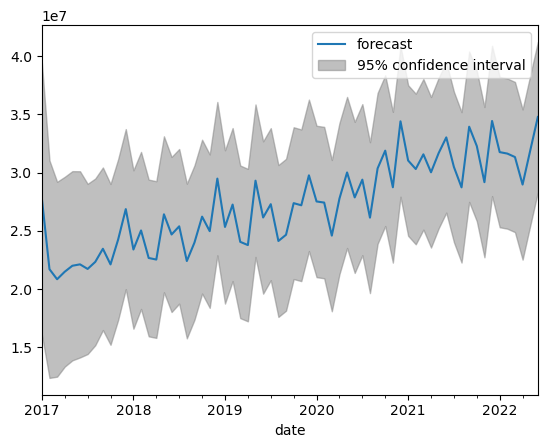

In [93]:
plot_predict(model_fit, dynamic=False)
plt.show()

<AxesSubplot:xlabel='date'>

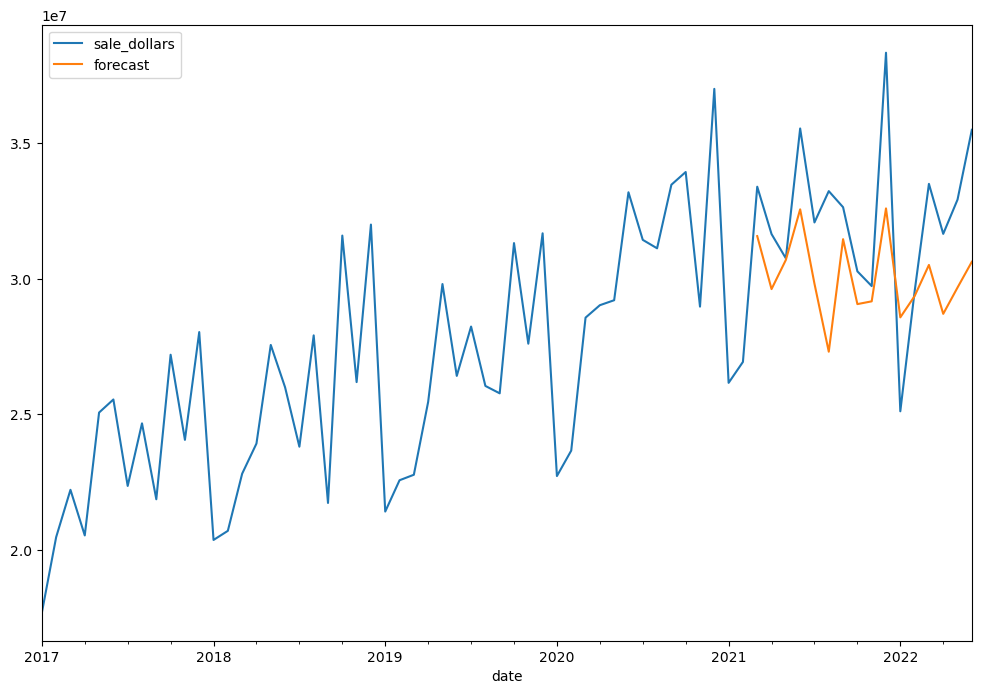

In [55]:
df_month_new['forecast']=model_fit.predict(start=50,end=70,dynamic=True)
df_month_new[['sale_dollars','forecast']].plot(figsize=(12,8))

In [56]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_month_new.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [57]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_month_new.columns)

In [58]:
future_datest_df.tail()

,sale_dollars,sale_dollars_first_differ,forecast
2024-01-01,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN
2024-05-01,NaN,NaN,NaN


In [59]:
future_df=pd.concat([df_month_new,future_datest_df])

<AxesSubplot:>

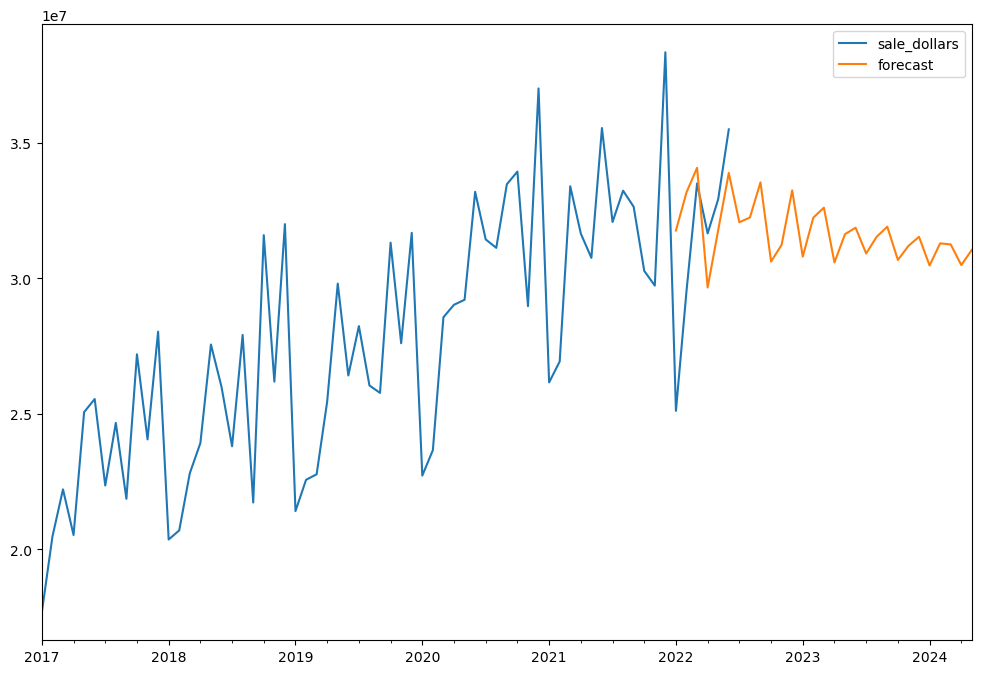

In [65]:
future_df['forecast'] = model_fit.predict(start = 60, end = 200, dynamic= True)  
future_df[['sale_dollars','forecast']].plot(figsize=(12, 8)) 

In [70]:
import statsmodels.api as sm

In [55]:
import statsmodels
import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA


df.head()


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-13260400008,2018-07-16,5440,Quik-Pik,502 West Erie St.,Missouri Valley,51555,POINT (-95.900592 41.556396),43,HARRISON,...,35314,Barton Vodka,24,375,1.71,2.57,48,123.36,18.0,4.76
1,INV-10283200006,2018-02-08,5117,Food & Gas Mart / Marshalltown,"613, N 3rd Ave",Marshalltown,50158.0,POINT (-92.9081 42.057471),64,MARSHALL,...,36904,Mccormick Vodka Pet,24,375,1.80,2.70,48,129.60,18.0,4.76
2,INV-08555700031,2017-11-09,2130,Sycamore Convenience,617 Sycamore,Waterloo,50703,POINT (-92.335358 42.497854),7,BLACK HAWK,...,35926,Five O'clock PET Vodka,12,750,3.37,5.06,24,121.44,18.0,4.76
3,INV-08812600010,2017-11-22,4514,Casey's General Store #2813 / Fort Dodge,1230 3rd Ave NW,Fort Dodge,50501,POINT (-94.218425 42.515441),94,WEBSTER,...,35916,Five O'clock Vodka,12,750,3.37,5.06,24,121.44,18.0,4.76
4,INV-03465000036,2017-02-24,5145,South Side Food Mart,1101 Army Post Rd,Des Moines,50315.0,POINT (-93.628783 41.526511),77,POLK,...,36904,Mccormick Vodka Pet,24,375,1.80,2.70,48,129.60,18.0,4.76


In [4]:
timestamp = datetime.now().strftime("%d-%m-%YT%H_%M_%S")
MODEL_NAME = f"{MODEL_NAME_PREFIX}{timestamp}"
print(f"Model name: {MODEL_NAME}")

Model name: bqml_arimaplus_dw_20-09-2022T03_20_48


In [5]:
TRAIN_TABLE_NAME = f"train_{timestamp}"
TEST_TABLE_NAME = f"test_{timestamp}"

create_train_query = """
    CREATE TABLE "`{}`.{}.{}"
    """.format(PROJECT, DATASET, TRAIN_TABLE_NAME)

In [6]:
training_query = """
    CREATE MODEL "`{}`.{}.{}"
        OPTIONS(MODEL_TYPE="{}", DATA_FREQUENCY="{}")
    """.format(PROJECT, DATASET, MODEL_NAME, MODEL_TYPE, GRANULARITY)

training_query

'\n    CREATE MODEL "`csce5214-p1`.csce5214_iowa_sales.bqml_arimaplus_dw_20-09-2022T03_20_48"\n        OPTIONS(MODEL_TYPE="arima_plus", DATA_FREQUENCY="DAILY")\n    '